In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - ANN - DNN/3.Regression using ANN

/content/drive/MyDrive/Machine learning 2024/Notebooks - ANN - DNN/3.Regression using ANN


Explanation for the dataset:

1. **mpg**: Fuel efficiency in miles per gallon.
2. **cylinders**: Number of engine cylinders.
3. **displacement**: Engine size, typically in cubic inches or liters.
4. **horsepower**: Engine power output.
5. **weight**: Car’s weight in pounds or kilograms.
6. **acceleration**: Time to go from 0 to 60 mph.
7. **model year**: Year the car model was released.
8. **origin**: Country/region of manufacture.
9. **car name**: Brand and model of the car.

**IMPORTING LIBRARIES**


In [4]:
!pip install tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [5]:
import tensorflow as tf
print(tf.__version__)

2.17.0


**LOAD DATASET**

In [6]:
data=pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
data=data.drop(columns=['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


Here we convert the origin country which is a categorical column to numerical taking UK=1, EUROPE=2 and USA=3.

In [8]:
origin=data.pop('origin')
data['uk']=(origin==1)*1
data['europe']=(origin==2)*2
data['usa']=(origin==3)*3
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,uk,europe,usa
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,2,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [9]:
data.shape

(398, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   uk            398 non-null    int64  
 8   europe        398 non-null    int64  
 9   usa           398 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ KB


In [11]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data['horsepower']=data['horsepower'].replace('?',0)
data['horsepower'] = data['horsepower'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   uk            398 non-null    int64  
 8   europe        398 non-null    int64  
 9   usa           398 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 31.2 KB


Splitted the complete dataset into train and test data in the fraction of 80:20

Basic Statistics of the train dataset

In [14]:
train_data_state=data.describe().T
train_data_state

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
uk,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
europe,398.0,0.351759,0.762393,0.0,0.000,0.0,0.000,2.0
usa,398.0,0.595477,1.198101,0.0,0.000,0.0,0.000,3.0


As we see in the basic statistics of dataset, all the columns in different scales, here we normalize data using z-score normalization.

In [ ]:
# Standard scaler for the train_data['mpg']

import numpy as np
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
data['mpg'] = scaler1.fit_transform(np.array(data['mpg']).reshape(-1, 1))

In [ ]:
data['mpg']

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [ ]:
# prompt: standard scaler for all features except mpg
scaler2 = StandardScaler()
data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'uk', 'europe', 'usa']] = scaler2.fit_transform(data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'uk', 'europe', 'usa']])


In [ ]:
y=data['mpg']
X=data.drop(columns=['mpg'])

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

BUILD THE MODEL-
Building of a feed forward neural network with Two hidden layers and one output layer with 16 units in the hidden layers and using relu activation function as the non-linear activation function. Optimizer used in this model is RMSprop which is used in general for the model of regression.

In [ ]:
# linear , swish, relu, gelu, tanh, sigmoid, softmax

def build_model():
    model=keras.Sequential([layers.Dense(16, activation='relu'),
                            layers.Dense(16, activation='relu'),
                            layers.Dense(16, activation='relu'),
                                                 layers.Dense(1)])

    #optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
    return model

In [ ]:
model=build_model()

Converting the Features and labels of the dataset to numpy array to feed into the network.

In [ ]:
# prompt: checkpoint early stopping, reduce on plateue, save best model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('mpg_regressor.keras', monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    X_train,
    y_train,
    epochs=5000,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr, model_checkpoint], verbose=1
)


Epoch 1/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 1.1915 - mae: 0.9038 - mse: 1.1915 - val_loss: 1.3164 - val_mae: 0.9625 - val_mse: 1.3164 - learning_rate: 0.0010
Epoch 2/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.9460 - mae: 0.8027 - mse: 0.9460 - val_loss: 1.0181 - val_mae: 0.8428 - val_mse: 1.0181 - learning_rate: 0.0010
Epoch 3/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7679 - mae: 0.7293 - mse: 0.7679 - val_loss: 0.7911 - val_mae: 0.7396 - val_mse: 0.7911 - learning_rate: 0.0010
Epoch 4/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.5405 - mae: 0.6001 - mse: 0.5405 - val_loss: 0.6060 - val_mae: 0.6390 - val_mse: 0.6060 - learning_rate: 0.0010
Epoch 5/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.4749 - mae: 0.5408 - mse: 0.4749 - val_loss: 0.4583 - val_mae: 0.5433 - val_mse: 0.4583 - learning_rate: 0.0010
Epoch 6/5000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3328 - mae: 0.4601 - mse: 0.3328 - val_loss: 0.3475 - val_mae: 0.4629 - v

Train the model

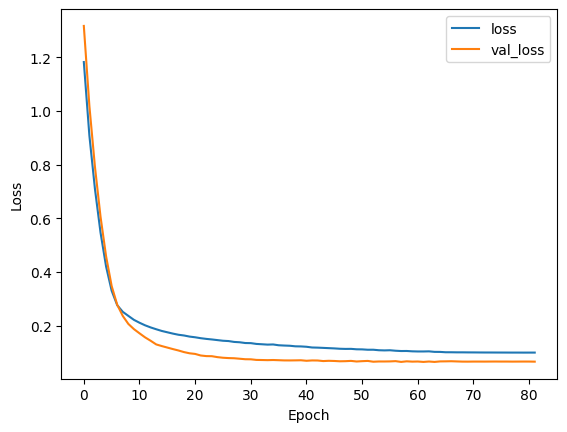

In [ ]:
# plot the cureve for loss and val loss

import matplotlib.pyplot as plt
# Plot the loss and val_loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


MAKE PREDICTIONS

In [ ]:
# load best model

from keras.models import load_model

# Load the best model
model = load_model('mpg_regressor.keras')


In [ ]:
test_predictions=model.predict(X_test)
test_predictions[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ 0.03349413],
       [-0.73355436],
       [-0.5851574 ],
       [ 1.3796343 ],
       [-1.0559726 ]], dtype=float32)

EVALUATE THE MODEL USING MEAN SQUARED ERROR

In [ ]:
loss,mae,mse=model.evaluate(X_test,y_test,verbose=0)
print('Testing mean squared error:MPG', format(mse))

Testing mean squared error:MPG 0.08791390806436539


In [ ]:
# Reverse transform for the mpg i y_test and test_predictions using scaler1

import numpy as np
# Reverse transform for mpg in y_test and test_predictions using scaler2
y_test_original = scaler1.inverse_transform(np.array(y_test).reshape(-1, 1))
test_predictions_original = scaler1.inverse_transform(test_predictions)

print(y_test_original[:5])
print(test_predictions_original[:5])


[[21. ]
 [18. ]
 [21. ]
 [36.1]
 [18. ]]
[[23.776033]
 [17.78833 ]
 [18.946741]
 [34.284218]
 [15.271483]]
